  0%|          | 0/5000 [00:00<?, ?it/s]

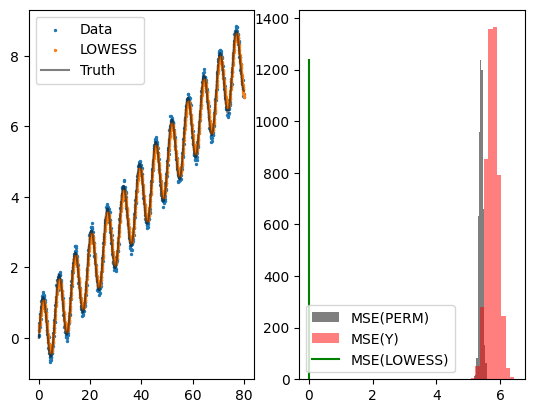

In [1]:
# https://stats.stackexchange.com/questions/557381/how-do-i-interpret-or-explain-loess-plot
# https://gist.github.com/galenseilis/dcc853c5826a0d977ddada766b5c582f
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
import numpy as np
from p_tqdm import p_map
from astropy.stats import bootstrap

x = np.linspace(0,80,1000)
y =  np.sin(x) + 0.1 * x + np.random.normal(0, 0.1, size=1000)

def parallel_perm(*args):
    xperm = x
    yperm = np.random.permutation(y)
    yhat = lowess(yperm, xperm, frac=1/30, return_sorted=False)
    mse = np.mean(np.power(yperm - yhat, 2))
    return mse

result = p_map(parallel_perm, range(5000))
yhat = lowess(y, x, frac=1/30, return_sorted=False)

fig, axes = plt.subplots(1,2)
axes[0].scatter(x, y, s=2, label='Data')
axes[0].scatter(x, yhat, s=2, label='LOWESS')
axes[0].plot(x, np.sin(x) + 0.1 * x, label='Truth', color='k', alpha=0.5)
axes[0].legend()

n, bins, patches = axes[1].hist(result,
                                bins=10,
                                color='k',
                                alpha=0.5,
                                label='MSE(PERM)')

booty = bootstrap(y,
                  5000,
                  bootfunc=lambda n: np.mean(np.power(n - np.mean(n), 2)))
axes[1].hist(booty,
             bins=10,
             color='red',
             alpha=0.5,
             label='MSE(Y)')
axes[1].plot(2*[np.mean(np.power(y-yhat, 2))],
             [0, np.max(n)],
             color='green',
             label='MSE(LOWESS)')
axes[1].legend()

plt.show()
